In [150]:
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [74]:
df = pd.read_csv('./utils/experiment.csv', sep=';')

In [75]:
df.columns

Index(['sample', 'start', 'latency'], dtype='object')

In [76]:
df['start'] = df['start'].apply(lambda x: x.split('.')[0])

In [78]:
df['latency'] = df['latency'].apply(lambda x: math.floor(x/1000))

In [79]:
df

,sample,start,latency
0,23,20:23:21,3
1,1,20:23:03,3
2,64,20:23:55,3
3,2,20:23:03,3
4,3,20:23:04,3
...,...,...,...
58,40,20:23:21,17
59,62,20:23:39,18
60,46,20:23:25,19
61,61,20:23:38,19


In [204]:
data = {'count' : Counter(), 'avg': Counter()}
for item in pd.date_range("20:23:03", "20:23:55", freq="1s"):
    data['count'][item.strftime('%H:%M:%S')] = 0
    data['avg'][item.strftime('%H:%M:%S')] = 0

In [205]:
for _, item in df.iterrows():
    d = datetime.strptime(item.start, '%H:%M:%S')
    dd = d
    data['count'][dd.strftime('%H:%M:%S')] += 1
    for iitem in range(item.latency):
        dd = dd + timedelta(seconds=1)
        data['count'][dd.strftime('%H:%M:%S')] += 1
    data['avg'][(d).strftime('%H:%M:%S')] += item.latency

In [206]:
for item in data['count'].keys():
    if data['count'][item] != 0:
        data['avg'][item] /= data['count'][item]

In [207]:
data_parsed = {'count': data['count'].values(), 'avg': data['avg'].values()}

In [208]:
data_parsed = {'avg': {k:v for k, v in data['avg'].items() if float(v) > 0.0}}

In [209]:
data_parsed['count'] = data['count']

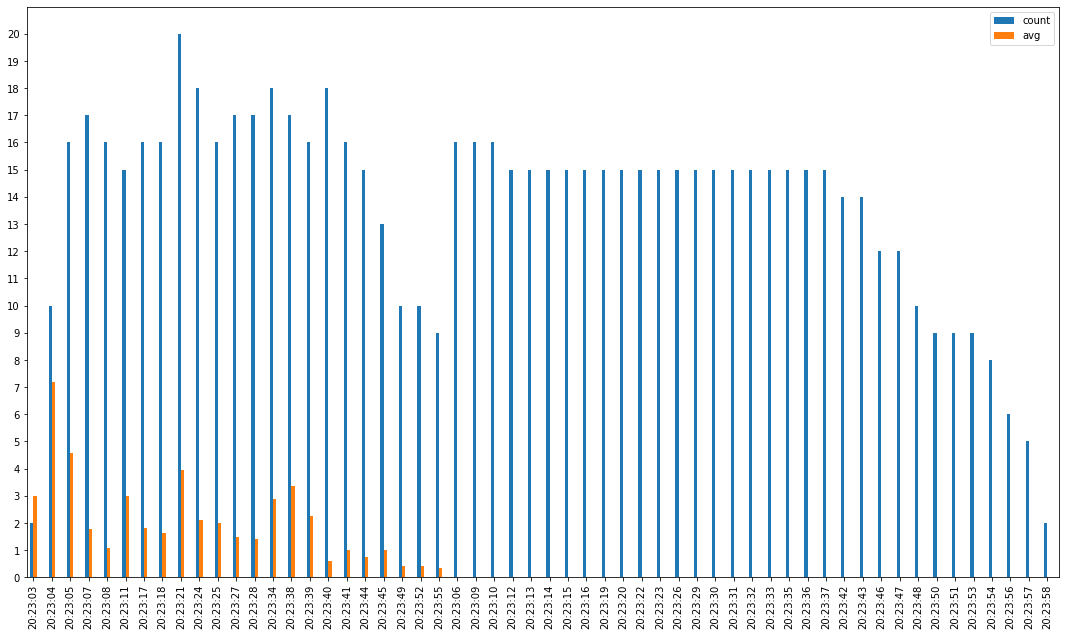

In [210]:
width = .35 # width of a bar

m1_t = pd.DataFrame(data_parsed)

m1_t[['count', 'avg']].plot(kind='bar', width = width)

ax = plt.gca()
plt.xlim([-width, len(m1_t['count'])-width])
ax.set_yticks(np.arange(0, max(m1_t['count'])+1, 1))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [198]:
data_parsed

{'avg': {'20:23:06': 0.375,
  '20:23:07': 0.35294117647058826,
  '20:23:10': 1.25,
  '20:23:16': 2.3333333333333335,
  '20:23:17': 1.5625,
  '20:23:18': 0.8125,
  '20:23:20': 0.8666666666666667,
  '20:23:21': 3.35,
  '20:23:24': 1.6666666666666667,
  '20:23:25': 1.0625,
  '20:23:27': 1.8823529411764706,
  '20:23:28': 1.2352941176470589,
  '20:23:33': 0.6,
  '20:23:34': 2.3333333333333335,
  '20:23:37': 1.9333333333333333,
  '20:23:38': 3.411764705882353,
  '20:23:40': 2.2222222222222223,
  '20:23:41': 1.3125,
  '20:23:44': 1.8666666666666667,
  '20:23:45': 0.8461538461538461,
  '20:23:47': 1.6666666666666667,
  '20:23:48': 1.0,
  '20:23:49': 1.1,
  '20:23:52': 1.3,
  '20:23:53': 0.4444444444444444,
  '20:23:55': 5.444444444444445,
  '20:23:58': 8.0,
  '20:23:56': 0.6666666666666666,
  '20:23:57': 10.6},
 'count': Counter({'20:23:03': 2,
          '20:23:04': 10,
          '20:23:05': 16,
          '20:23:06': 16,
          '20:23:07': 17,
          '20:23:08': 16,
          '20:23:09':